In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
df = pd.read_csv('metabolic_syndrome.csv')
df = df.drop(columns=['albuminuria', 'seqn'])
df


,age,sex,marital,income,race,waistcirc,bmi,uralbcr,uricacid,bloodglucose,hdl,triglycerides,metabolicsyndrome
0,22,Male,Single,8200.0,White,81.0,23.3,3.88,4.9,92,41,84,No MetSyn
1,44,Female,Married,4500.0,White,80.1,23.2,8.55,4.5,82,28,56,No MetSyn
2,21,Male,Single,800.0,Asian,69.6,20.1,5.07,5.4,107,43,78,No MetSyn
3,43,Female,Single,2000.0,Black,120.4,33.3,5.22,5.0,104,73,141,No MetSyn
4,51,Male,Married,NaN,Asian,81.1,20.1,8.13,5.0,95,43,126,No MetSyn
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2396,48,Female,Married,1000.0,Other,NaN,59.7,22.11,5.8,152,57,107,No MetSyn
2397,30,Female,Single,2000.0,Asian,NaN,18.0,2.90,7.9,91,90,91,No MetSyn
2398,28,Male,Single,800.0,MexAmerican,100.8,29.4,2.78,6.2,99,47,84,No MetSyn
2399,27,Male,Married,8200.0,MexAmerican,106.6,31.3,4.15,6.2,100,41,124,MetSyn


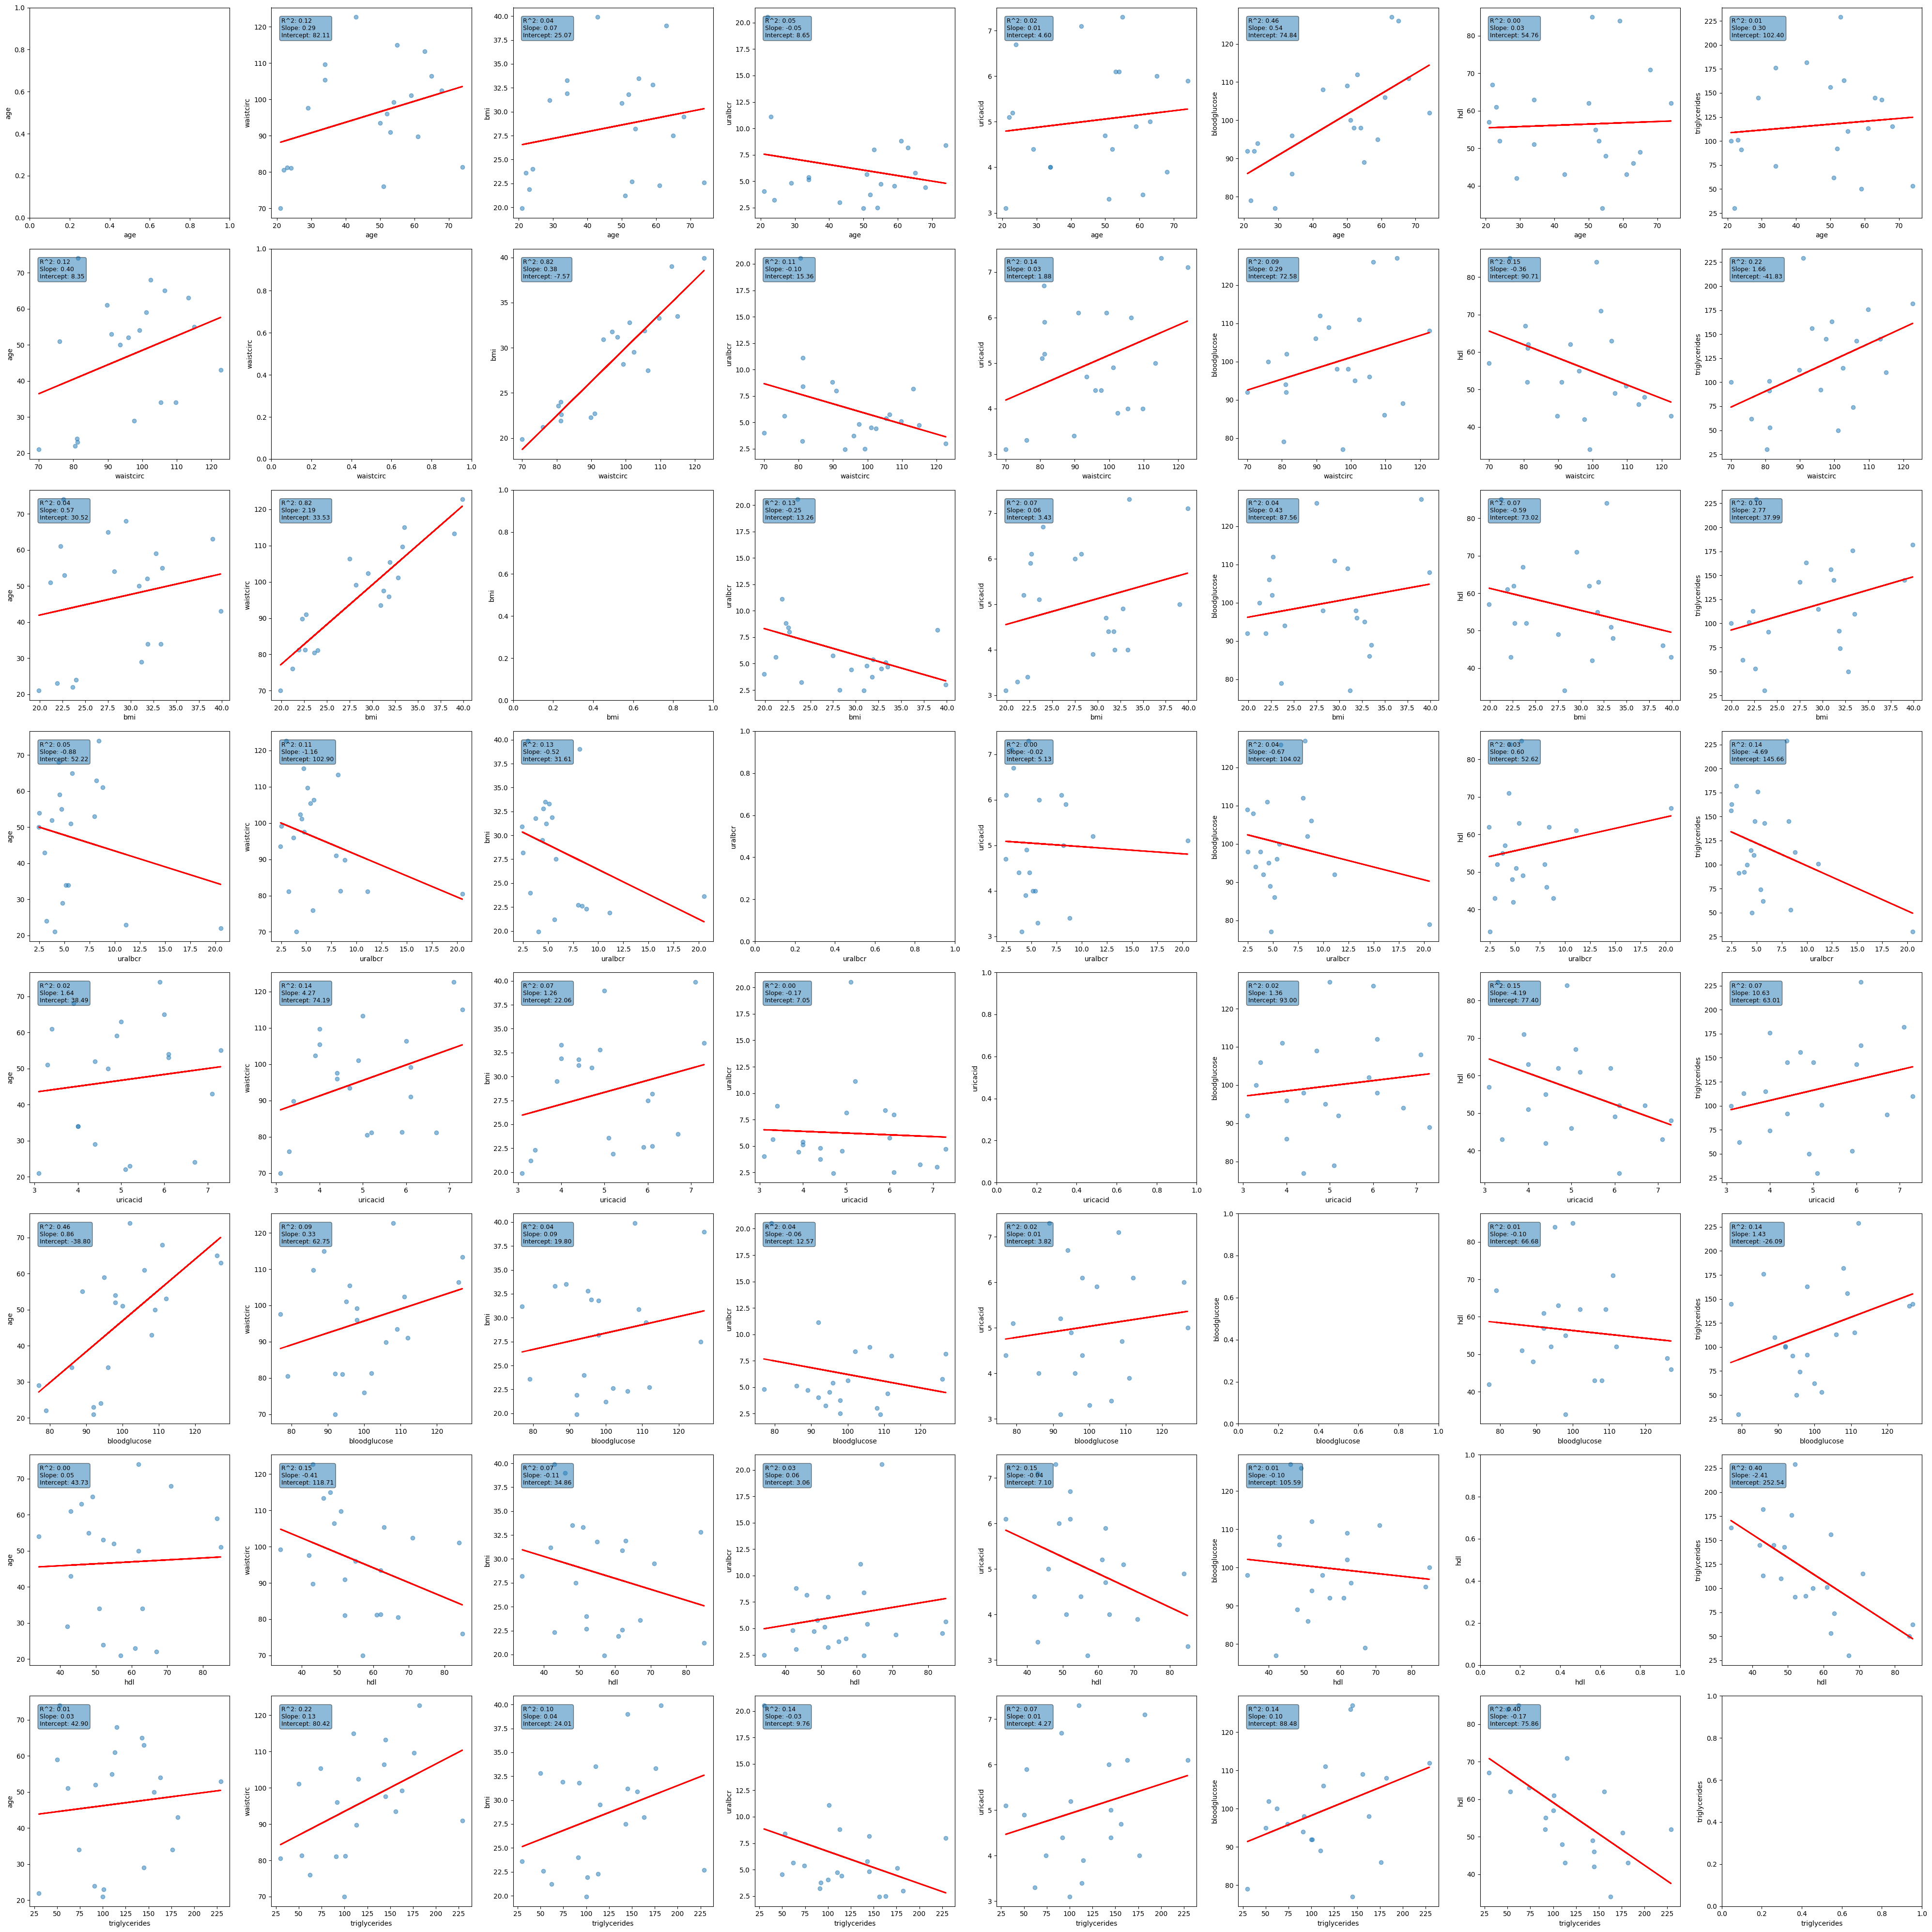

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm


df = pd.read_csv('metabolic_syndrome.csv')


df = df.drop(columns=['albuminuria', 'seqn', 'sex', 'income', 'race', 'marital', 'metabolicsyndrome'])


def remove_outliers(df, column):
    if df[column].dtype != 'object': 
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    else:
        return df


def preprocess_data(df):
    for var in df.columns:
        df = remove_outliers(df, var)
    return df


df = preprocess_data(df)


grid_size = len(df.columns)


sampled_df = df.sample(n=20, random_state=1)  


fig, axes = plt.subplots(grid_size, grid_size, figsize=(grid_size * 5, grid_size * 5))


def plot_regression(ax, x, y, data):
    if x != y and data[x].dtype != 'object' and data[y].dtype != 'object':
        model = sm.OLS(data[y], sm.add_constant(data[x])).fit()
        intercept, slope = model.params
        line = slope * data[x] + intercept
        ax.plot(data[x], line, color='red', linewidth=2)
        ax.scatter(data[x], data[y], alpha=0.5)
        # Annotate with equation and R-squared
        ax.annotate(f'R^2: {model.rsquared:.2f}\nSlope: {slope:.2f}\nIntercept: {intercept:.2f}', 
                    xy=(0.05, 0.95), xycoords='axes fraction', 
                    ha='left', va='top', fontsize=9, bbox=dict(boxstyle="round", alpha=0.5))
    
    # Set labels
    ax.set_xlabel(x)
    ax.set_ylabel(y)


for i, var1 in enumerate(df.columns):
    for j, var2 in enumerate(df.columns):
        ax = axes[i, j]
        plot_regression(ax, var1, var2, sampled_df)


plt.tight_layout()
plt.show()
